In [47]:
import pandas as pd
import numpy as np

In [48]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost
import catboost
from catboost import CatBoostClassifier
from skopt.space import Real, Integer , Categorical  # for skopt: pip install scikit-optimize
import time
from catboost import CatBoostClassifier

In [49]:
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

In [50]:
df = pd.read_csv('test_data.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,173560,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,9480.0,EXP,502,CIB,55-64,not_inst,86.525974,North,direct,18.0
1,173561,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1620.0,EXP,526,CIB,55-64,to_inst,61.968085,south,direct,38.0
2,173562,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,...,3240.0,CRIF,827,EXP,<25,to_inst,94.471154,North,direct,59.0
3,173563,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,2100.0,EXP,591,CIB,55-64,to_inst,91.015625,North,direct,42.0
4,173564,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,...,6180.0,EXP,598,EXP,35-44,to_inst,96.383648,North,direct,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63712,237272,2019,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,7920.0,CRIF,597,EXP,65-74,to_inst,30.457227,North,direct,48.0
63713,237273,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,5760.0,CIB,632,CIB,45-54,not_inst,73.867314,North,direct,39.0
63714,237274,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,11580.0,EXP,605,EXP,35-44,not_inst,64.274691,North,direct,36.0
63715,237275,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,6540.0,CIB,545,CIB,35-44,not_inst,75.082237,south,direct,31.0


In [51]:
df = pd.read_csv('Sample_Submission.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Sample_Submission.csv'

In [52]:
df = pd.read_csv('train_data.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [53]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [19]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

LOAN_LIMIT :  2 unique values
--------------------
cf     135348
ncf      9978
Name: loan_limit, dtype: int64

 LOAN_LIMIT (normalized)
--------------------
cf     0.931341
ncf    0.068659
Name: loan_limit, dtype: float64

*************************************************


GENDER :  4 unique values
--------------------
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

 GENDER (normalized)
--------------------
Male                 0.284832
Joint                0.278462
Sex Not Available    0.253306
Female               0.183399
Name: Gender, dtype: float64

*************************************************


APPROV_IN_ADV :  2 unique values
--------------------
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64

 APPROV_IN_ADV (normalized)
--------------------
nopre    0.84339
pre      0.15661
Name: approv_in_adv, dtype: float64

*************************************************


LOAN_

In [55]:
df1=df.copy()
df.drop(['year','ID','open_credit','construction_type','Security_Type'],axis=1,inplace=True)

In [56]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,116500,NaN,NaN,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
1,cf,Male,nopre,type2,p1,l1,b/c,206500,NaN,NaN,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN
2,cf,Male,pre,type1,p1,l1,nob/c,406500,4.560,0.2000,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0
3,cf,Male,nopre,type1,p4,l1,nob/c,456500,4.250,0.6810,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0
4,cf,Joint,pre,type1,p1,l1,nob/c,696500,4.000,0.3042,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nob/c,436500,3.125,0.2571,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nob/c,586500,5.190,0.8544,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nob/c,446500,3.125,0.0816,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nob/c,196500,3.500,0.5824,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,0,29.0


In [19]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtir1               

In [57]:
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(),inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(),inplace=True)
df['Upfront_charges'].fillna(df['Upfront_charges'].mean(),inplace=True)
df['term'].fillna(df['term'].mean(),inplace=True)
df['property_value'].fillna(df['property_value'].mean(),inplace=True)
df['income'].fillna(df['income'].mean(),inplace=True)
df['LTV'].fillna(df['LTV'].mean(),inplace=True)
df['dtir1'].fillna(df['dtir1'].mean(),inplace=True)

df['loan_limit'].fillna(df['loan_limit'].value_counts().index[0],inplace=True)
df['approv_in_adv'].fillna(df['approv_in_adv'].value_counts().index[0],inplace=True)
df['loan_purpose'].fillna(df['loan_purpose'].value_counts().index[0],inplace=True)
df['Neg_ammortization'].fillna(df['Neg_ammortization'].value_counts().index[0],inplace=True)
df['age'].fillna(df['age'].value_counts().index[0],inplace=True)
df['submission_of_application'].fillna(df['submission_of_application'].value_counts().index[0],inplace=True)

df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Status                       0
dtir1                        0
dtype: int64

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


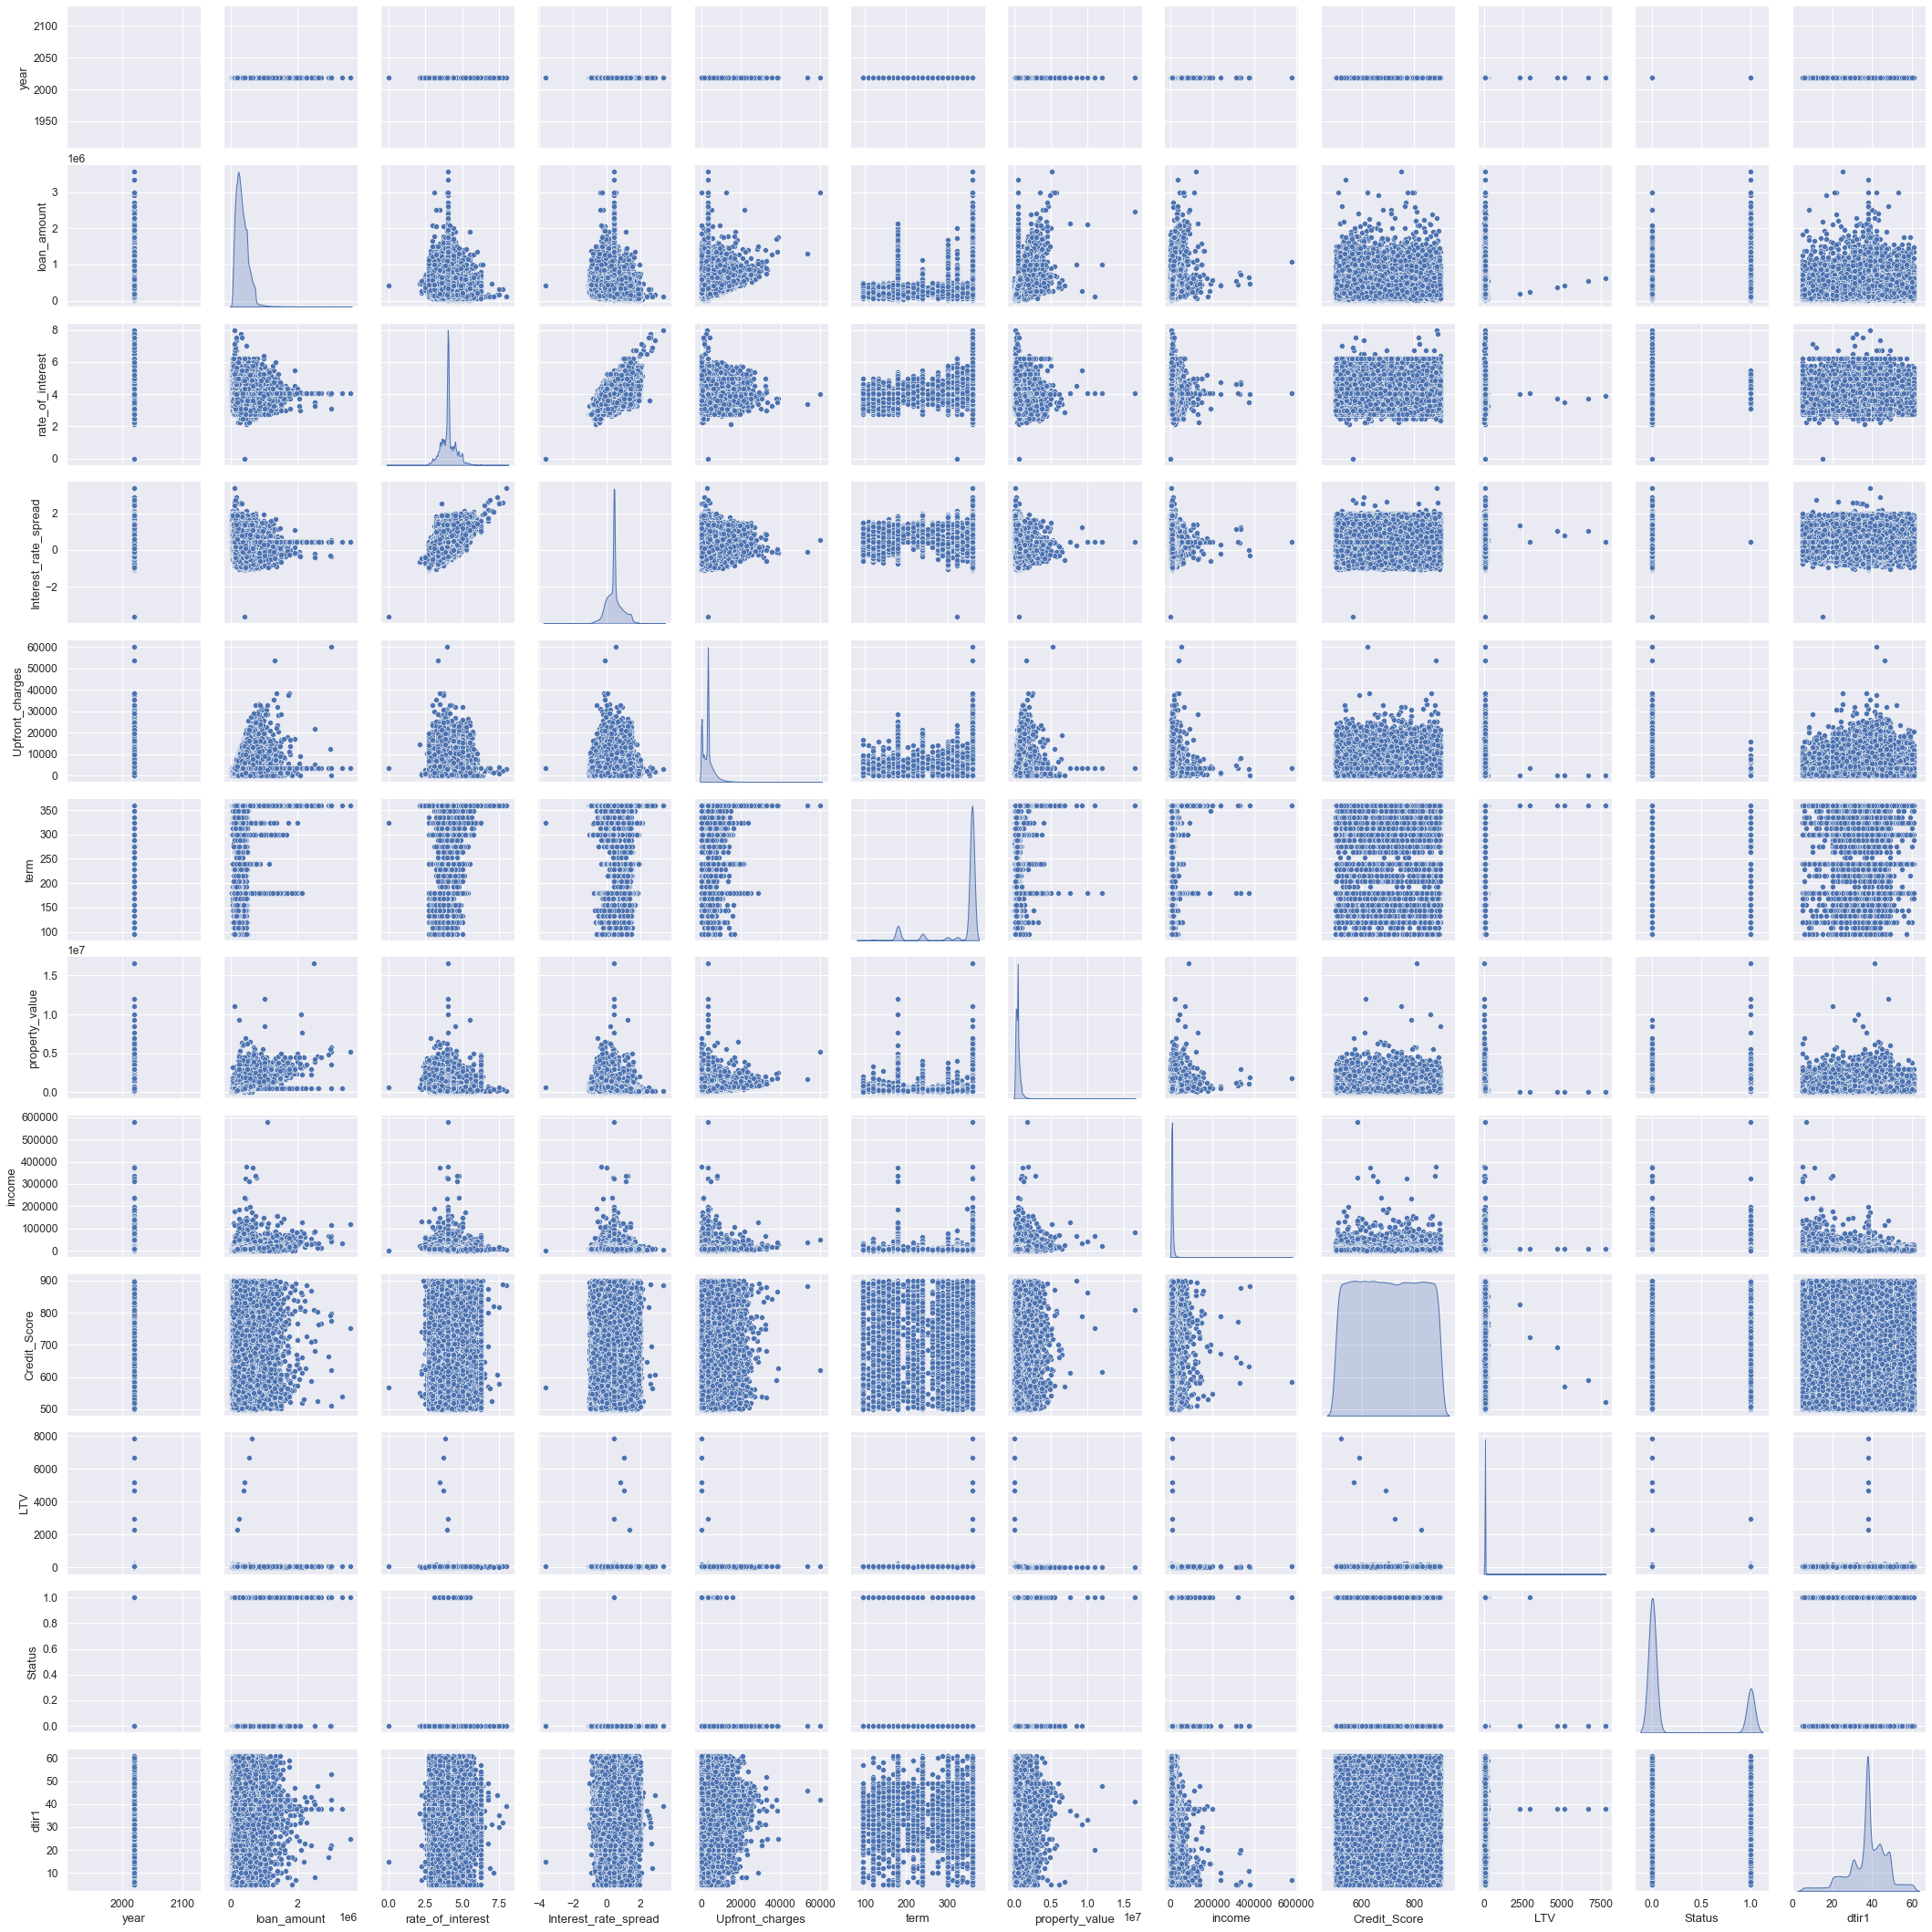

In [34]:
import seaborn as sns
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde')
sns.set(font_scale=1)

In [75]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()

Description of year
--------------------------------
count    148670.0
mean       2019.0
std           0.0
min        2019.0
25%        2019.0
50%        2019.0
75%        2019.0
max        2019.0
Name: year, dtype: float64 

Distribution of year
-------------------------------------


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


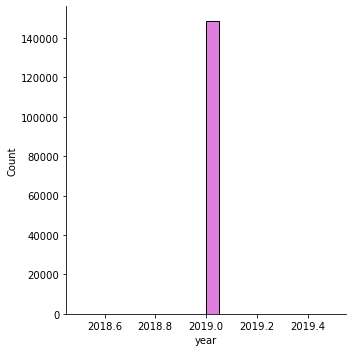

BoxPlot of year
------------------------------


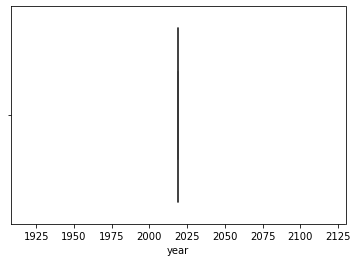

Description of loan_amount
--------------------------------
count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64 

Distribution of loan_amount
-------------------------------------


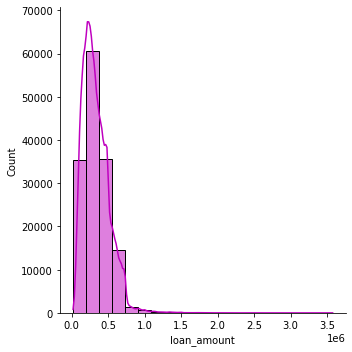

BoxPlot of loan_amount
------------------------------


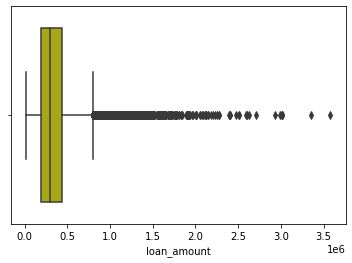

Description of total_units
--------------------------------
count    148670.000000
mean          1.021679
std           0.198521
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: total_units, dtype: float64 

Distribution of total_units
-------------------------------------


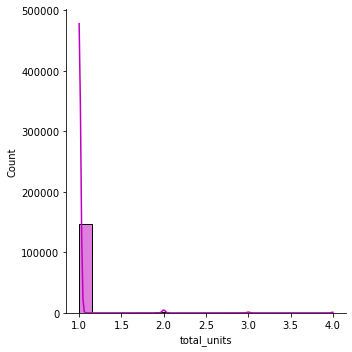

BoxPlot of total_units
------------------------------


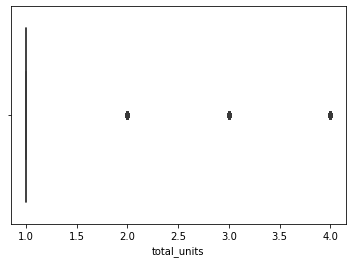

Description of Credit_Score
--------------------------------
count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64 

Distribution of Credit_Score
-------------------------------------


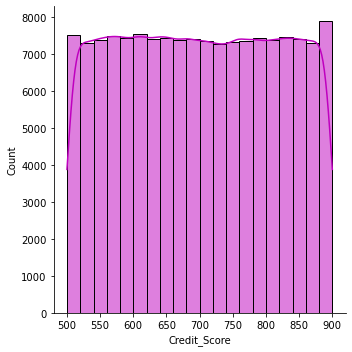

BoxPlot of Credit_Score
------------------------------


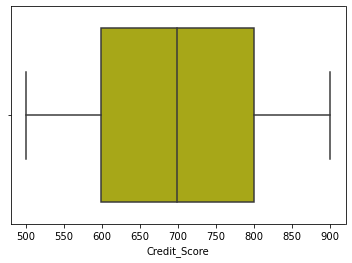

Description of Status
--------------------------------
count    148670.000000
mean          0.246445
std           0.430942
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Status, dtype: float64 

Distribution of Status
-------------------------------------


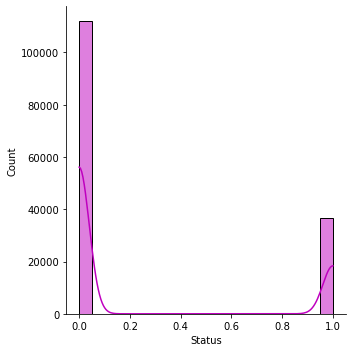

BoxPlot of Status
------------------------------


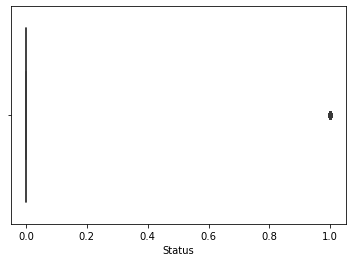

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
lstcolumns = list(df.select_dtypes(include='int64').columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

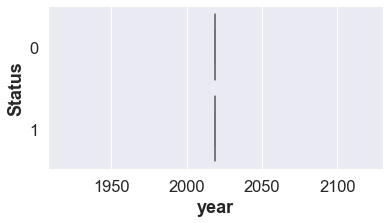

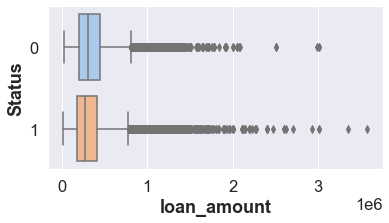

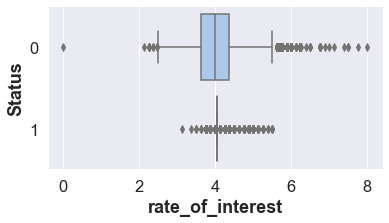

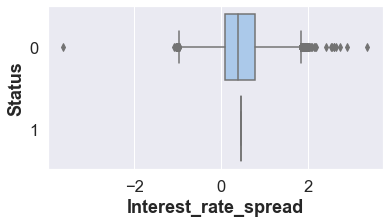

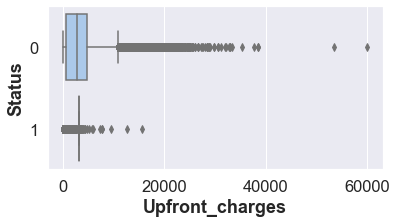

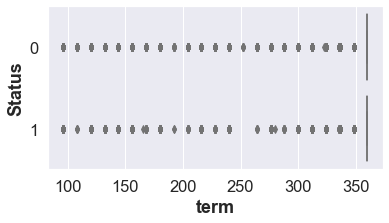

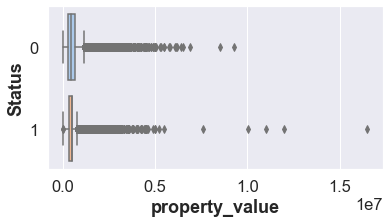

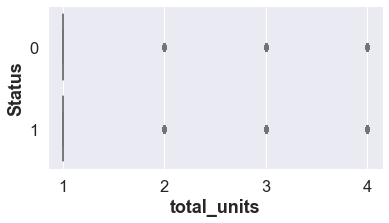

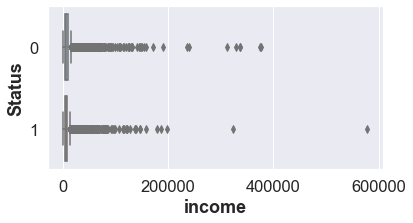

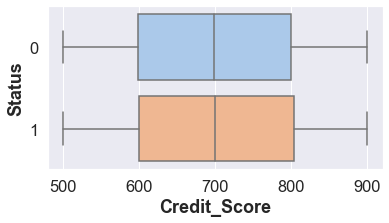

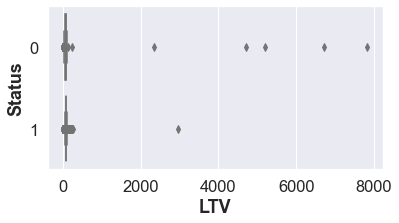

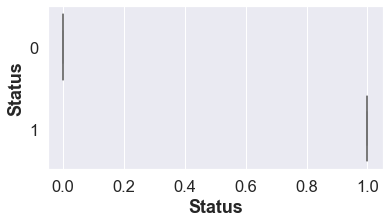

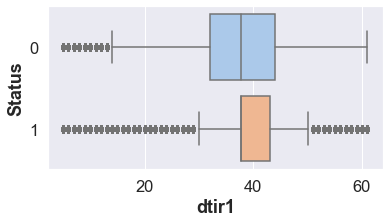

In [79]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='Status', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Status',weight="bold")
        plt.show()
sns.set(font_scale=1)

In [106]:
#df['Status']=df['Status'].astype('category')

In [21]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   year                       148670 non-null  int64   
 1   loan_limit                 148670 non-null  object  
 2   Gender                     148670 non-null  object  
 3   approv_in_adv              148670 non-null  object  
 4   loan_type                  148670 non-null  object  
 5   loan_purpose               148670 non-null  object  
 6   Credit_Worthiness          148670 non-null  object  
 7   business_or_commercial     148670 non-null  object  
 8   loan_amount                148670 non-null  int64   
 9   rate_of_interest           148670 non-null  float64 
 10  Interest_rate_spread       148670 non-null  float64 
 11  Upfront_charges            148670 non-null  float64 
 12  term                       148670 non-null  float64 
 13  Neg_ammortizat

In [58]:
X = df.drop('Status', axis=1)
X = pd.get_dummies(X,drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns,index=X.index)
y = df['Status']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=1, stratify=y)

In [60]:
search_space = list()
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='C'))
search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'))
search_space.append(Integer(1, 5, name='degree'))
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='gamma'))

In [65]:
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # configure the model with specific hyperparameters
    model = svm.SVC()
    model.set_params(**params)
    # define test harness
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='f1')
    # calculate the mean of the scores
    estimate = np.mean(result)
    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate

In [ ]:
# perform optimization
result = gp_minimize(evaluate_model, search_space)

In [ ]:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))